In [1]:
import numpy as np
import datetime
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import math, warnings
import statistics 
from collections import defaultdict
import pyodbc

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
besan_df = pd.read_csv("allsales.csv", sep=",", encoding = "ISO-8859-1")
besan_df

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,week,month,Channel,City,Customer,Demandzone_Region,DemandZone_RouteGroup,DemandZone_Vehicle,FU,Category,...,sacrfeast_after,SOLDTO_ID,PRODUCT_ID,SALES_DATE,tts,listPrice,case_net,kg_net,ispromo,promo
0,2018-W01,2018-M01,Discounter,ISTANBUL,B.I.M.-TR,Region-03,ISTANBUL-AND,33P,LYL TPB 153,TEA_TEA,...,0,15023980,32011992,2018-01-03,0.228634,63.051237,72.0,177.410000,0,NaN
1,2018-W01,2018-M01,Discounter,ISTANBUL,B.I.M.-TR,Region-03,ISTANBUL-AND,33P,CALVE XL SOS,FOODS CORE_DRESSINGS,...,0,15023980,67308750,2018-01-04,0.108820,17.337032,40.0,144.200000,0,NaN
2,2018-W01,2018-M01,Discounter,ISTANBUL,B.I.M.-TR,Region-03,ISTANBUL-AND,33P,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,...,0,15023980,21114598,2018-01-05,0.154288,26.022305,48.0,193.680000,0,NaN
3,2018-W01,2018-M01,Discounter,ISTANBUL,B.I.M.-TR,Region-03,ISTANBUL-AND,33P,KNORR TABLET BULYON 6 LT,FOODS CORE_SAVOURY,...,0,15023980,67090815,2018-01-05,0.256709,21.750000,54.0,388.800000,0,NaN
4,2018-W01,2018-M01,Discounter,ISTANBUL,B.I.M.-TR,Region-03,ISTANBUL-AND,33P,KNORR CABUK CORBALAR,FOODS CORE_SAVOURY,...,0,15023980,67305665,2018-01-05,0.131404,47.520000,48.0,72.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502296,2019-W52,2019-M12,Discounter,BALIKESIR,SOK-TR,Region-11,BALIKESIR,33P,LYL TPB 320,TEA_TEA,...,0,15469654,70006862,2019-12-25,0.097753,80.062497,72.0,368.640015,0,NaN
502297,2019-W52,2019-M12,Discounter,BALIKESIR,SOK-TR,Region-11,BALIKESIR,33P,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,...,0,15469654,67129110,2019-12-25,0.093716,40.795149,12.0,108.860001,0,NaN
502298,2019-W52,2019-M12,Discounter,BALIKESIR,SOK-TR,Region-11,BALIKESIR,33P,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,...,0,15469654,67129108,2019-12-25,0.093717,50.391014,24.0,176.259995,0,NaN
502299,2019-W52,2019-M12,Discounter,BALIKESIR,SOK-TR,Region-11,BALIKESIR,33P,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,...,0,15469654,67129112,2019-12-25,0.093718,37.246377,10.0,99.360001,0,NaN


In [3]:
besan_df.columns

Index(['week', 'month', 'Channel', 'City', 'Customer', 'Demandzone_Region',
       'DemandZone_RouteGroup', 'DemandZone_Vehicle', 'FU', 'Category',
       'Brand', 'SubBrand', 'PRODUCT_WEIGHT', 'CASE_NET_KG', 'CASE_AMOUNT',
       'DP', 'SP', 'PRODUCT_TYPE', 'ramadan', 'ramadan_before',
       'ramadan_after', 'sacrfeast', 'sacrfeast_before', 'sacrfeast_after',
       'SOLDTO_ID', 'PRODUCT_ID', 'SALES_DATE', 'tts', 'listPrice', 'case_net',
       'kg_net', 'ispromo', 'promo'],
      dtype='object')

In [4]:
besan_df.Customer.value_counts()

Metro-TR           103366
Migros-TR           99758
Carrefour-TR        66559
SOK-TR              41418
B.I.M.-TR           33421
                    ...  
GÜLER GIDA            197
ESFA KIMYA AS         163
PEKDEMIR ÇIFTLI       150
A.S.WATSONS-TR         59
HEPSIBURADA            47
Name: Customer, Length: 66, dtype: int64

In [5]:
besan_df.FU.value_counts()

KNORR HAZIR CORBALAR        50457
LYL TB HERBAL               31775
KNORR CABUK CORBALAR        28887
CARTEDOR PUDING             22185
KNORR TABLET BULYON 6 LT    19433
                            ...  
SIYAH INCI TPB 384             21
LIPTON CHANEL                  18
LYL 700                        15
CALVE KETCAP 900G              10
CALVE MAYONEZ 455 GR            1
Name: FU, Length: 135, dtype: int64

In [6]:
besan_df.Category.value_counts()

FOODS CORE_SAVOURY      191983
TEA_TEA                 185919
FOODS CORE_DRESSINGS     83156
FOODS CORE_DESSERTS      41243
Name: Category, dtype: int64

In [7]:
besan_d_df = besan_df.drop(['ispromo', 'promo', 'tts', 'SOLDTO_ID', 'week', 'month', 'Channel', 'Demandzone_Region', 'DemandZone_RouteGroup', 'DemandZone_Vehicle',  'DP', 'SP', 'PRODUCT_TYPE', 'ramadan', 'ramadan_before', 'ramadan_after', 'sacrfeast', 'sacrfeast_before', 'sacrfeast_after', 'listPrice', 'PRODUCT_ID', 'CASE_NET_KG', 'CASE_AMOUNT', 'case_net', 'PRODUCT_WEIGHT' ], axis=1)
besan_d_df

,City,Customer,FU,Category,Brand,SubBrand,SALES_DATE,kg_net
0,ISTANBUL,B.I.M.-TR,LYL TPB 153,TEA_TEA,LIPTON,LIPTON TEA POT BAGS,2018-01-03,177.410000
1,ISTANBUL,B.I.M.-TR,CALVE XL SOS,FOODS CORE_DRESSINGS,CALVE,CALVE M&F SAUCES,2018-01-04,144.200000
2,ISTANBUL,B.I.M.-TR,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,KNORR,KNORR SOUP,2018-01-05,193.680000
3,ISTANBUL,B.I.M.-TR,KNORR TABLET BULYON 6 LT,FOODS CORE_SAVOURY,KNORR,KNORR BOUILLON,2018-01-05,388.800000
4,ISTANBUL,B.I.M.-TR,KNORR CABUK CORBALAR,FOODS CORE_SAVOURY,KNORR,KNORR HOT SNACKS,2018-01-05,72.000000
...,...,...,...,...,...,...,...,...
502296,BALIKESIR,SOK-TR,LYL TPB 320,TEA_TEA,LIPTON,LIPTON TEA POT BAGS,2019-12-25,368.640015
502297,BALIKESIR,SOK-TR,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,KNORR,KNORR SOUP,2019-12-25,108.860001
502298,BALIKESIR,SOK-TR,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,KNORR,KNORR SOUP,2019-12-25,176.259995
502299,BALIKESIR,SOK-TR,KNORR HAZIR CORBALAR,FOODS CORE_SAVOURY,KNORR,KNORR SOUP,2019-12-25,99.360001


In [8]:
besan_df_sum = besan_d_df.groupby(['SALES_DATE', 'Customer', 'City', 'Category','FU']).sum()
besan_df_sum

kg_net
SALES_DATE Customer          City   Category             FU                                 
2018-01-02 ALTUNBILEKLER -TR ANKARA FOODS CORE_DRESSINGS CALVE BALLI HARDAL 12X280G    15.60
                                                         CALVE BBQ MPO 12X290G         34.80
                                                         CALVE HOT SAUCE MPO 12X275G   63.60
                                                         CALVE KETCAP 400 GR           64.00
                                                         CALVE KETCAP 600 GR           61.60
...                                                                                      ...
2020-01-10 Özdilek-TR        BURSA  TEA_TEA              LYL TPB 153                    4.92
                                                         LYL TPB 320                   15.36
                                                         OTHER TPB 153                  2.46
                                                         OTHER TPB 320                  5.12
                                                         SIYAH INCI TB 50               1.26

[275146 rows x 1 columns]

In [10]:
besan_df_sum.reset_index(inplace=True)
besan_df_sum


,index,SALES_DATE,Customer,City,Category,FU,kg_net
0,0,2018-01-02,ALTUNBILEKLER -TR,ANKARA,FOODS CORE_DRESSINGS,CALVE BALLI HARDAL 12X280G,15.60
1,1,2018-01-02,ALTUNBILEKLER -TR,ANKARA,FOODS CORE_DRESSINGS,CALVE BBQ MPO 12X290G,34.80
2,2,2018-01-02,ALTUNBILEKLER -TR,ANKARA,FOODS CORE_DRESSINGS,CALVE HOT SAUCE MPO 12X275G,63.60
3,3,2018-01-02,ALTUNBILEKLER -TR,ANKARA,FOODS CORE_DRESSINGS,CALVE KETCAP 400 GR,64.00
4,4,2018-01-02,ALTUNBILEKLER -TR,ANKARA,FOODS CORE_DRESSINGS,CALVE KETCAP 600 GR,61.60
...,...,...,...,...,...,...,...
275141,275141,2020-01-10,Özdilek-TR,BURSA,TEA_TEA,LYL TPB 153,4.92
275142,275142,2020-01-10,Özdilek-TR,BURSA,TEA_TEA,LYL TPB 320,15.36
275143,275143,2020-01-10,Özdilek-TR,BURSA,TEA_TEA,OTHER TPB 153,2.46
275144,275144,2020-01-10,Özdilek-TR,BURSA,TEA_TEA,OTHER TPB 320,5.12


In [11]:
besan_df_ist = besan_df_sum.loc[(besan_df_sum.City == 'ISTANBUL') & ( besan_df_sum.Category=='FOODS CORE_DRESSINGS')]
besan_df_ist

,index,SALES_DATE,Customer,City,Category,FU,kg_net
9,9,2018-01-02,B.I.M-File,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 600 GR,644.000000
10,10,2018-01-02,B.I.M-File,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 540 GR,480.000000
32,32,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE BBQ MPO 12X290G,24.360000
33,33,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE HOT SAUCE MPO 12X275G,12.720000
34,34,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 400 GR,16.000000
...,...,...,...,...,...,...,...
275109,275109,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 600 GR,360.000000
275110,275110,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE LIGHT MAYONEZ,26.400000
275111,275111,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 250 GR,27.000000
275112,275112,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 335 GR,103.599998


In [12]:
besan_df_ist.reset_index(inplace=True)
besan_df_ist.drop('index', axis=1, inplace=True)
besan_df_ist


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,level_0,SALES_DATE,Customer,City,Category,FU,kg_net
0,9,2018-01-02,B.I.M-File,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 600 GR,644.000000
1,10,2018-01-02,B.I.M-File,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 540 GR,480.000000
2,32,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE BBQ MPO 12X290G,24.360000
3,33,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE HOT SAUCE MPO 12X275G,12.720000
4,34,2018-01-02,BIÇEN GIDA-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 400 GR,16.000000
...,...,...,...,...,...,...,...
11373,275109,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE KETCAP 600 GR,360.000000
11374,275110,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE LIGHT MAYONEZ,26.400000
11375,275111,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 250 GR,27.000000
11376,275112,2020-01-10,ÖZKURUSLAR-TR,ISTANBUL,FOODS CORE_DRESSINGS,CALVE MAYONEZ 335 GR,103.599998


In [13]:
besan_df_ist.Customer.value_counts()

Carrefour-TR           2696
Migros-TR              1725
CETINKAYA               602
MOPAS -TR               596
ÇAGRI GIDA -TR          572
HAKMAR GIDA -TR         520
ALTUN GIDA -TR          498
B.I.M-File              418
SOK-TR                  396
MNK ISTANBUL 2.0        359
SAFAK GIDA -TR          327
SIMAR SARI-TR           302
BIÇEN GIDA-TR           285
BURDA TR                280
UCLER (TR)              271
ULU KARDESLER           236
B.I.M.-TR               214
ÖZKURUSLAR-TR           206
ONUR GIDA -TR           201
ALTUNLAR                164
Gazi  TR                130
BIRLIK GIDA             117
IRMAKLAR G - TR          93
YENI MAGAZACILIK         82
SOV                      38
HAKMAR EKSPRES GIDA      19
ESFA KIMYA AS            18
ROSSMANN                 13
Name: Customer, dtype: int64

In [14]:
besan_df_ist.FU.value_counts()

CALVE KETCAP 600 GR                 1114
CALVE KETCAP 400 GR                  868
CALVE RANCH MPO 12X245G              848
CALVE HARDAL 245 GR                  846
CALVE MAYONEZ 540 GR                 742
CALVE MAYONEZ 335 GR                 720
CALVE BBQ MPO 12X290G                717
CALVE HOT SAUCE MPO 12X275G          717
CALVE SARIMSAKLI MAYONEZ 250 GR      569
CALVE BALLI HARDAL 12X280G           449
CALVE LIGHT MAYONEZ                  368
CALVE ACILI TAVUK                    335
CALVE MAYONEZ CAM 500GR              328
CALVE XL SOS                         299
CALVE DIP SOS                        259
CALVE KETCAP 250 GR                  242
HELLMANS KETCAP 520 GR               227
HELLMANS MAYONEZ 450 GR              186
HELLMANS KETCAP 290 GR               160
CALVE CHEDDAR SOS                    150
HELLMANS FLAVORED MAYONEZ 235 GR     150
HELLMANNS HARDAL 245 GR              142
CALVE MAYONEZ 250 GR                 136
HELLMANS MAYONEZ 235 GR              132
CALVE MAYONEZ CA

In [95]:
df = besan_df_ist.loc[(besan_df_ist.SALES_DATE == '2018-01-02') & (besan_df_ist.Customer == 'B.I.M-File'), ['FU','kg_net']]
df

,FU,kg_net
0,CALVE KETCAP 600 GR,644.0
1,CALVE MAYONEZ 540 GR,480.0


In [94]:
df2=df.FU.apply(lambda x : besan_df_ist.loc[(besan_df_ist.SALES_DATE == '2018-01-02') & (besan_df_ist.Customer == 'B.I.M-File')])
df2

0       SALES_DATE    Customer      City           ...
1       SALES_DATE    Customer      City           ...
Name: FU, dtype: object

In [15]:
besan_df_ist_d = pd.get_dummies(besan_df_ist.FU)
besan_df_ist_d=besan_df_ist_d.apply(lambda x : x* besan_df_ist.iloc[x.index].kg_net)
besan_df_ist_d

,CALVE ACILI TAVUK,CALVE BALLI HARDAL 12X280G,CALVE BBQ MPO 12X290G,CALVE BURGER MPO 12X265G,CALVE CHEDDAR SOS,CALVE DIP SOS,CALVE HARDAL 245 GR,CALVE HOT SAUCE MPO 12X275G,CALVE KETCAP 250 GR,CALVE KETCAP 400 GR,...,CALVE XL SOS,HELLMAN S MAYONEZ CAM,HELLMANNS ACI SOS,HELLMANNS BBQ RET 12X285G,HELLMANNS HARDAL 245 GR,HELLMANS FLAVORED MAYONEZ 235 GR,HELLMANS KETCAP 290 GR,HELLMANS KETCAP 520 GR,HELLMANS MAYONEZ 235 GR,HELLMANS MAYONEZ 450 GR
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,24.36,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,12.72,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11373,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11374,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11375,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11376,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
besan_df_ist_d['SALES_DATE'] = besan_df_ist.SALES_DATE
besan_df_ist_d['Customer'] = besan_df_ist.Customer
besan_df_ist_d

,CALVE ACILI TAVUK,CALVE BALLI HARDAL 12X280G,CALVE BBQ MPO 12X290G,CALVE BURGER MPO 12X265G,CALVE CHEDDAR SOS,CALVE DIP SOS,CALVE HARDAL 245 GR,CALVE HOT SAUCE MPO 12X275G,CALVE KETCAP 250 GR,CALVE KETCAP 400 GR,...,HELLMANNS ACI SOS,HELLMANNS BBQ RET 12X285G,HELLMANNS HARDAL 245 GR,HELLMANS FLAVORED MAYONEZ 235 GR,HELLMANS KETCAP 290 GR,HELLMANS KETCAP 520 GR,HELLMANS MAYONEZ 235 GR,HELLMANS MAYONEZ 450 GR,SALES_DATE,Customer
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-02,B.I.M-File
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-02,B.I.M-File
2,0.0,0.0,24.36,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-02,BIÇEN GIDA-TR
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,12.72,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-02,BIÇEN GIDA-TR
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-02,BIÇEN GIDA-TR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11373,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-10,ÖZKURUSLAR-TR
11374,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-10,ÖZKURUSLAR-TR
11375,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-10,ÖZKURUSLAR-TR
11376,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-10,ÖZKURUSLAR-TR


In [17]:
df=besan_df_ist_d.groupby(['SALES_DATE', 'Customer']).sum()
df.reset_index(inplace=True)
df

,SALES_DATE,Customer,CALVE ACILI TAVUK,CALVE BALLI HARDAL 12X280G,CALVE BBQ MPO 12X290G,CALVE BURGER MPO 12X265G,CALVE CHEDDAR SOS,CALVE DIP SOS,CALVE HARDAL 245 GR,CALVE HOT SAUCE MPO 12X275G,...,CALVE XL SOS,HELLMAN S MAYONEZ CAM,HELLMANNS ACI SOS,HELLMANNS BBQ RET 12X285G,HELLMANNS HARDAL 245 GR,HELLMANS FLAVORED MAYONEZ 235 GR,HELLMANS KETCAP 290 GR,HELLMANS KETCAP 520 GR,HELLMANS MAYONEZ 235 GR,HELLMANS MAYONEZ 450 GR
0,2018-01-02,B.I.M-File,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,2018-01-02,BIÇEN GIDA-TR,0.000000,0.0,24.360000,0.0,0.000000,0.0,0.0,12.72,...,0.00,24.0,0.0,0.0,0.0,5.64,18.9,19.2,0.0,15.8
2,2018-01-03,B.I.M.-TR,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,1182.44,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,2018-01-04,B.I.M-File,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,2018-01-04,B.I.M.-TR,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,468.65,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,2020-01-10,Carrefour-TR,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2440,2020-01-10,MNK ISTANBUL 2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2441,2020-01-10,SOK-TR,0.000000,0.0,0.000000,0.0,0.000000,0.0,192.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2442,2020-01-10,ÇAGRI GIDA -TR,45.900002,0.0,121.800003,0.0,0.000000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [18]:
df_cluster = df.drop(['SALES_DATE', 'Customer'], axis=1)
df_cluster

,CALVE ACILI TAVUK,CALVE BALLI HARDAL 12X280G,CALVE BBQ MPO 12X290G,CALVE BURGER MPO 12X265G,CALVE CHEDDAR SOS,CALVE DIP SOS,CALVE HARDAL 245 GR,CALVE HOT SAUCE MPO 12X275G,CALVE KETCAP 250 GR,CALVE KETCAP 400 GR,...,CALVE XL SOS,HELLMAN S MAYONEZ CAM,HELLMANNS ACI SOS,HELLMANNS BBQ RET 12X285G,HELLMANNS HARDAL 245 GR,HELLMANS FLAVORED MAYONEZ 235 GR,HELLMANS KETCAP 290 GR,HELLMANS KETCAP 520 GR,HELLMANS MAYONEZ 235 GR,HELLMANS MAYONEZ 450 GR
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.000000,0.0,24.360000,0.0,0.000000,0.0,0.0,12.72,0.0,16.0,...,0.00,24.0,0.0,0.0,0.0,5.64,18.9,19.2,0.0,15.8
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,1182.44,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,468.65,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,142.8,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2440,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,9.6,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2441,0.000000,0.0,0.000000,0.0,0.000000,0.0,192.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2442,45.900002,0.0,121.800003,0.0,0.000000,0.0,0.0,0.00,0.0,112.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner

In [51]:
#df1.iloc[x][df.iloc[x].FU]*df.iloc[x].kg_net
#df.loc['2018-01-02',    'BIÇEN GIDA-TR']
df.loc[df.iloc[0].name]

CALVE ACILI TAVUK                     0.0
CALVE BALLI HARDAL 12X280G            0.0
CALVE BBQ MPO 12X290G                 0.0
CALVE BURGER MPO 12X265G              0.0
CALVE CHEDDAR SOS                     0.0
CALVE DIP SOS                         0.0
CALVE HARDAL 245 GR                   0.0
CALVE HOT SAUCE MPO 12X275G           0.0
CALVE KETCAP 250 GR                   0.0
CALVE KETCAP 400 GR                   0.0
CALVE KETCAP 535 GR                   0.0
CALVE KETCAP 600 GR                 644.0
CALVE KETCAP 700GR                    0.0
CALVE KOFTE SOS                       0.0
CALVE LIGHT MAYONEZ                   0.0
CALVE MAX KETCAP                      0.0
CALVE MAYONEZ 250 GR                  0.0
CALVE MAYONEZ 335 GR                  0.0
CALVE MAYONEZ 455 GR                  0.0
CALVE MAYONEZ 540 GR                480.0
CALVE MAYONEZ CAM 250GR               0.0
CALVE MAYONEZ CAM 500GR               0.0
CALVE ORGANIK KETCAP 280              0.0
CALVE RANCH MPO 12X245G           

In [69]:
besan_df_ist.iloc[5].kg_net

201.0

In [20]:
df_tea = besan_df.loc[besan_df.Category == 'TEA_TEA'][['FU', 'kg_net']]
df_tea

,FU,kg_net
0,LYL TPB 153,177.410000
7,LYL TPB 153,177.410000
8,LDK 1000,648.000000
13,LDK 1000,324.000000
14,LYL TPB 153,177.410000
...,...,...
502285,OTHER TPB 320,230.399994
502286,LDK TB 50,115.199997
502292,LDK 1000,4212.000000
502294,OTHER TB 50,33.599998


In [21]:
df_tea_d = pd.get_dummies(df_tea.FU)
df_tea_d['kg_net'] = df_tea['kg_net']
df_tea_d

,ALTIN HARMAN 1000,ALTIN HARMAN TB 60,ALTIN HARMAN TPB 320,FILIZ 1000,FILIZ 500,FILIZ TPB 153,FILIZ TPB 320,FILIZ TPB 422,FLAVOURED TPB 153,HERBAL TPB,...,SIGNATURE TB,SIYAH INCI 1000,SIYAH INCI 500,SIYAH INCI TB 200,SIYAH INCI TB 50,SIYAH INCI TPB 153,SIYAH INCI TPB 320,SIYAH INCI TPB 384,TEATONIC TB,kg_net
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,177.410000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,177.410000
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,648.000000
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,324.000000
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,177.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,230.399994
502286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115.199997
502292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4212.000000
502294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33.599998


In [235]:
from sklearn.decomposition import PCA

pca = PCA(5) 
pca.fit(df_cluster) 
  
pca_data = pd.DataFrame(pca.transform(df_cluster)) 
  
print(pca_data.head())


0           1           2            3           4
0 -118.626976  295.441221 -114.814783  -127.097175  349.567733
1 -112.267570 -170.164224  -86.051785   -95.597484   53.285460
2 -111.236451 -410.500326 -185.342487  1080.469296  127.458170
3 -111.225130 -228.881836 -124.064968   -80.369208  -62.744905
4 -110.006365 -394.520785 -137.003583   377.252609   19.708668


In [251]:
from sklearn.cluster import KMeans 
clusters = 5

kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(pca_data) 
  
print(kmeans.labels_)
df_clus = pd.DataFrame(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [84]:
from sklearn.cluster import KMeans 
clusters = 4

kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(df_cluster) 
  
print(kmeans.labels_)
df_clus = pd.DataFrame(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [252]:
import joblib
from sklearn.model_selection import train_test_split 
from sklearn import metrics


# save the model to disk
filename = 'kmeans_model.sav'
joblib.dump(kmeans, filename)


['kmeans_model.sav']

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, df['Customer'], test_size=0.3, random_state=42)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)
#print(loaded_model.labels_)


-816356859.3630164


In [254]:
Y_pred = loaded_model.predict(X_test)
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_result


,Actual,Predicted
1616,B.I.M-File,0
1876,CETINKAYA,0
2195,SOK-TR,0
521,SOK-TR,0
1330,Migros-TR,0
...,...,...
2103,Carrefour-TR,0
1085,SIMAR SARI-TR,0
59,SOK-TR,0
973,ÖZKURUSLAR-TR,3


In [55]:
df_result.Actual.value_counts()

SOK-TR                 84
Carrefour-TR           82
B.I.M.-TR              72
Migros-TR              55
B.I.M-File             41
MNK ISTANBUL 2.0       41
CETINKAYA              39
ÇAGRI GIDA -TR         31
MOPAS -TR              29
YENI MAGAZACILIK       27
HAKMAR GIDA -TR        26
ALTUN GIDA -TR         25
ULU KARDESLER          22
SIMAR SARI-TR          20
SAFAK GIDA -TR         18
BURDA TR               17
UCLER (TR)             16
Gazi  TR               15
BIÇEN GIDA-TR          15
ALTUNLAR               15
ÖZKURUSLAR-TR          14
ONUR GIDA -TR          12
BIRLIK GIDA             5
IRMAKLAR G - TR         5
HAKMAR EKSPRES GIDA     3
SOV                     3
ROSSMANN                2
Name: Actual, dtype: int64

In [255]:
df_result.reset_index(inplace=True)
df_result.drop('index', axis=1, inplace = True)
df_result.reset_index(inplace=True)
df_result

,index,Actual,Predicted
0,0,B.I.M-File,0
1,1,CETINKAYA,0
2,2,SOK-TR,0
3,3,SOK-TR,0
4,4,Migros-TR,0
...,...,...,...
729,729,Carrefour-TR,0
730,730,SIMAR SARI-TR,0
731,731,SOK-TR,0
732,732,ÖZKURUSLAR-TR,3


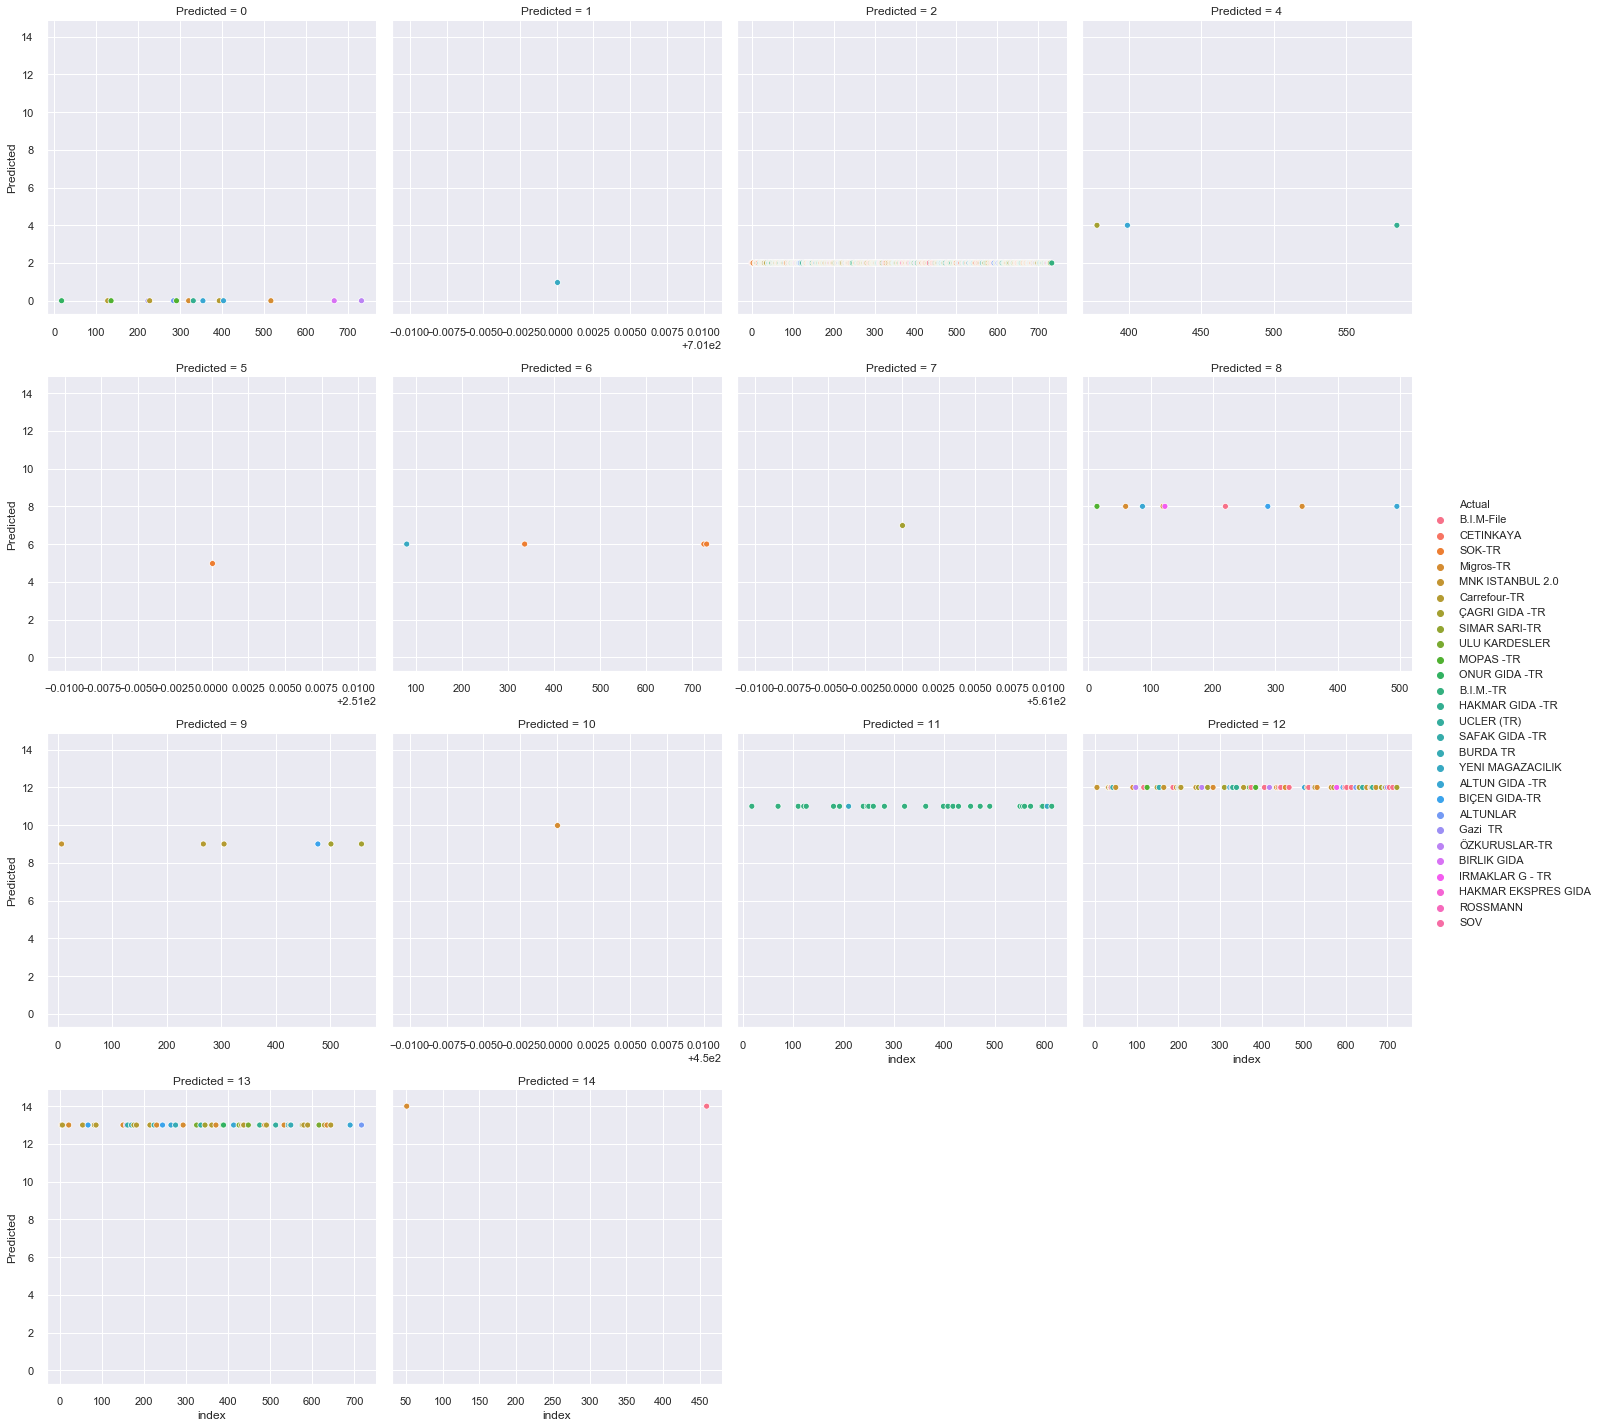

In [241]:
sns_plot = sns.relplot(x = 'index', y = 'Predicted', hue = 'Actual', col ='Predicted', col_wrap= 4, data = df_result, facet_kws=dict( sharex=False,sharey=True, despine=True)).set(adjustable='datalim', aspect='auto')


In [256]:
df_result.Predicted.value_counts()

0    701
3     26
4      5
2      1
1      1
Name: Predicted, dtype: int64

In [175]:
from collections import defaultdict

#default dict contains predicted values of clusters
clusters_predicted = defaultdict()

for i in df_result['index']:
    #default dict contains actual values in an observance 
    clusters_actual = defaultdict()

    if df_result.iloc[i].Predicted in clusters_predicted.keys():
        # when add the cluster and onservance before
        if df_result.iloc[i].Actual in clusters_predicted[df_result.iloc[i].Predicted].keys():
            clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] = clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] + 1.0
        # when there is the cluster but we do not see the observance before
        else:
            clusters_actual[df_result.iloc[i].Actual] = 1.0
            clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] = clusters_actual[df_result.iloc[i].Actual]
    # when no predicted class and no observance 
    else:
        clusters_actual[df_result.iloc[i].Actual] = 1.0
        clusters_predicted[df_result.iloc[i].Predicted] = clusters_actual


In [181]:
def cluster_analysis(df_analysis, i, clusters_predicted):

    #default dict contains actual values in an observance 
    clusters_actual = defaultdict()

    if df_result.iloc[i].Predicted in clusters_predicted.keys():
        # when add the cluster and onservance before
        if df_result.iloc[i].Actual in clusters_predicted[df_result.iloc[i].Predicted].keys():
            clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] = clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] + 1.0
        # when there is the cluster but we do not see the observance before
        else:
            clusters_actual[df_result.iloc[i].Actual] = 1.0
            clusters_predicted[df_result.iloc[i].Predicted][df_result.iloc[i].Actual] = clusters_actual[df_result.iloc[i].Actual]
    # when no predicted class and no observance 
    else:
        clusters_actual[df_result.iloc[i].Actual] = 1.0
        clusters_predicted[df_result.iloc[i].Predicted] = clusters_actual

In [248]:
def item_analysis(df_analysis, i, clusters_actual):

    #default dict contains actual values in an observance 
    clusters_predicted = defaultdict()

    if df_result.iloc[i].Actual in clusters_actual.keys():
        # when add the cluster and onservance before
        if df_result.iloc[i].Predicted in clusters_actual[df_result.iloc[i].Actual].keys():
            clusters_actual[df_result.iloc[i].Actual][df_result.iloc[i].Predicted] = clusters_actual[df_result.iloc[i].Actual][df_result.iloc[i].Predicted] + 1.0
        # when there is the cluster but we do not see the observance before
        else:
            clusters_predicted[df_result.iloc[i].Predicted] = 1.0
            clusters_actual[df_result.iloc[i].Actual][df_result.iloc[i].Predicted] = clusters_predicted[df_result.iloc[i].Predicted]
    # when no predicted class and no observance 
    else:
        clusters_predicted[df_result.iloc[i].Predicted] = 1.0
        clusters_actual[df_result.iloc[i].Actual] = clusters_predicted

In [257]:
#default dict contains predicted values of clusters
clusters_predicted = defaultdict()

df_result['index'].apply(lambda x : cluster_analysis(df_result, x, clusters_predicted))
clusters_predicted

defaultdict(None,
            {0: defaultdict(None,
                         {'B.I.M-File': 39.0,
                          'CETINKAYA': 39.0,
                          'SOK-TR': 83.0,
                          'Migros-TR': 48.0,
                          'MNK ISTANBUL 2.0': 41.0,
                          'Carrefour-TR': 79.0,
                          'ÇAGRI GIDA -TR': 29.0,
                          'SIMAR SARI-TR': 20.0,
                          'ULU KARDESLER': 22.0,
                          'B.I.M.-TR': 72.0,
                          'HAKMAR GIDA -TR': 24.0,
                          'UCLER (TR)': 16.0,
                          'SAFAK GIDA -TR': 18.0,
                          'BURDA TR': 17.0,
                          'YENI MAGAZACILIK': 26.0,
                          'ALTUN GIDA -TR': 20.0,
                          'MOPAS -TR': 26.0,
                          'ONUR GIDA -TR': 11.0,
                          'BIÇEN GIDA-TR': 14.0,
                          'ALTUNLAR': 14.

In [258]:
#default dict contains actual values of items
clusters_actual= defaultdict()

df_result['index'].apply(lambda x : item_analysis(df_result, x, clusters_actual))
clusters_actual

defaultdict(None,
            {'B.I.M-File': defaultdict(None, {0: 39.0, 3: 2.0}),
             'CETINKAYA': defaultdict(None, {0: 39.0}),
             'SOK-TR': defaultdict(None, {0: 83.0, 2: 1.0}),
             'Migros-TR': defaultdict(None, {0: 48.0, 3: 6.0, 4: 1.0}),
             'MNK ISTANBUL 2.0': defaultdict(None, {0: 41.0}),
             'Carrefour-TR': defaultdict(None, {0: 79.0, 3: 3.0}),
             'ÇAGRI GIDA -TR': defaultdict(None, {0: 29.0, 4: 2.0}),
             'SIMAR SARI-TR': defaultdict(None, {0: 20.0}),
             'ULU KARDESLER': defaultdict(None, {0: 22.0}),
             'MOPAS -TR': defaultdict(None, {3: 3.0, 0: 26.0}),
             'ONUR GIDA -TR': defaultdict(None, {3: 1.0, 0: 11.0}),
             'B.I.M.-TR': defaultdict(None, {0: 72.0}),
             'HAKMAR GIDA -TR': defaultdict(None, {0: 24.0, 3: 1.0, 4: 1.0}),
             'UCLER (TR)': defaultdict(None, {0: 16.0}),
             'SAFAK GIDA -TR': defaultdict(None, {0: 18.0}),
             'BURDA TR': 

In [233]:
import operator

def cluster_percentages(clusters_predicted):

    clusters_per = defaultdict(dict)
    sorted_x = defaultdict(dict)

    for cluster in clusters_predicted:
        summation = 0.0
        for item in clusters_predicted[cluster]:
            summation += clusters_predicted[cluster][item]
        for item in clusters_predicted[cluster]:
            clusters_per[cluster][item] = clusters_predicted[cluster][item] / summation
        sorted_x[cluster] = sorted(clusters_per[cluster].items(), key=operator.itemgetter(1), reverse=True)
    sorted_x = sorted(sorted_x.items(), key=operator.itemgetter(0))
    return sorted_x

In [263]:
sorted_predicted = cluster_percentages(clusters_predicted)

sorted_predicted

[(0,
  [('SOK-TR', 0.11840228245363767),
   ('Carrefour-TR', 0.11269614835948645),
   ('B.I.M.-TR', 0.10271041369472182),
   ('Migros-TR', 0.06847360912981455),
   ('MNK ISTANBUL 2.0', 0.05848787446504993),
   ('B.I.M-File', 0.05563480741797432),
   ('CETINKAYA', 0.05563480741797432),
   ('ÇAGRI GIDA -TR', 0.04136947218259629),
   ('YENI MAGAZACILIK', 0.037089871611982884),
   ('MOPAS -TR', 0.037089871611982884),
   ('HAKMAR GIDA -TR', 0.034236804564907276),
   ('ULU KARDESLER', 0.03138373751783167),
   ('SIMAR SARI-TR', 0.028530670470756064),
   ('ALTUN GIDA -TR', 0.028530670470756064),
   ('SAFAK GIDA -TR', 0.025677603423680456),
   ('BURDA TR', 0.024251069900142655),
   ('UCLER (TR)', 0.02282453637660485),
   ('BIÇEN GIDA-TR', 0.019971469329529243),
   ('ALTUNLAR', 0.019971469329529243),
   ('Gazi  TR', 0.019971469329529243),
   ('ÖZKURUSLAR-TR', 0.018544935805991442),
   ('ONUR GIDA -TR', 0.015691868758915834),
   ('BIRLIK GIDA', 0.005706134094151213),
   ('IRMAKLAR G - TR', 0.0057

In [262]:
sorted_actual = cluster_percentages(clusters_actual)

sorted_actual

[('ALTUN GIDA -TR', [(0, 0.8), (3, 0.16), (4, 0.04)]),
 ('ALTUNLAR', [(0, 0.9333333333333333), (3, 0.06666666666666667)]),
 ('B.I.M-File', [(0, 0.9512195121951219), (3, 0.04878048780487805)]),
 ('B.I.M.-TR', [(0, 1.0)]),
 ('BIRLIK GIDA', [(0, 0.8), (3, 0.2)]),
 ('BIÇEN GIDA-TR', [(0, 0.9333333333333333), (3, 0.06666666666666667)]),
 ('BURDA TR', [(0, 1.0)]),
 ('CETINKAYA', [(0, 1.0)]),
 ('Carrefour-TR', [(0, 0.9634146341463414), (3, 0.036585365853658534)]),
 ('Gazi  TR', [(0, 0.9333333333333333), (3, 0.06666666666666667)]),
 ('HAKMAR EKSPRES GIDA', [(0, 1.0)]),
 ('HAKMAR GIDA -TR',
  [(0, 0.9230769230769231),
   (3, 0.038461538461538464),
   (4, 0.038461538461538464)]),
 ('IRMAKLAR G - TR', [(0, 0.8), (3, 0.2)]),
 ('MNK ISTANBUL 2.0', [(0, 1.0)]),
 ('MOPAS -TR', [(0, 0.896551724137931), (3, 0.10344827586206896)]),
 ('Migros-TR',
  [(0, 0.8727272727272727),
   (3, 0.10909090909090909),
   (4, 0.01818181818181818)]),
 ('ONUR GIDA -TR', [(0, 0.9166666666666666), (3, 0.08333333333333333)])

In [45]:
df_clus[0].value_counts()

13    1720
0      273
12     118
11     114
14     110
2       42
5       18
10      18
8       10
4       10
9        5
3        2
6        2
7        1
1        1
Name: 0, dtype: int64

In [78]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips]

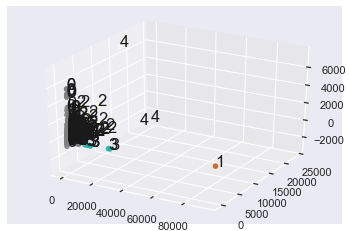

In [79]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 